<h3>2021 American Community Survey PUMS Data</h3>

<p>Data obtained from <a href="https://www.census.gov/programs-surveys/acs/microdata/access.html">https://www.census.gov/programs-surveys/acs/microdata/access.html</a>. In the FTP folder, the file naming convention is "h" = household, "p" = person, each of which are followed by the two-letter state abbreviation. Both CSV files (which are used here) and SAS-formatted files are available. This notebook uses the person dataset for Wisconsin.</p>

<p><b>Backstory</b>: <a href="https://twitter.com/jdjmke/status/1587194653161447428">https://twitter.com/jdjmke/status/1587194653161447428</a>
<p><b>2021 PUMS Data User's Guide</b>: <a href="https://www2.census.gov/programs-surveys/acs/tech_docs/pums/2021ACS_PUMS_User_Guide.pdf">https://www2.census.gov/programs-surveys/acs/tech_docs/pums/2021ACS_PUMS_User_Guide.pdf</a>

In [7]:
import pandas as pd
import numpy as np
import requests, zipfile, io
import seaborn as sns
import matplotlib.pyplot as plt

# download the data (10+ MB) and extracts
# to the current directory
r = requests.get("https://www2.census.gov/programs-surveys/acs/data/pums/2021/1-Year/csv_pwi.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# the zip file contains a PDF readme and the
# desired .csv file; open the latter now
df = pd.read_csv('psam_p55.csv')

''' 
DOCUMENTATION
-column value descriptions: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2021.pdf
-person-data documentation begins on pg. 33 of the PDF
-column value codes: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/code_lists/ACSPUMS2021CodeLists.xls '''

' \nDOCUMENTATION\n-column value descriptions: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2021.pdf\n-person-data documentation begins on pg. 33 of the PDF\n-column value codes: https://www2.census.gov/programs-surveys/acs/tech_docs/pums/code_lists/ACSPUMS2021CodeLists.xls '

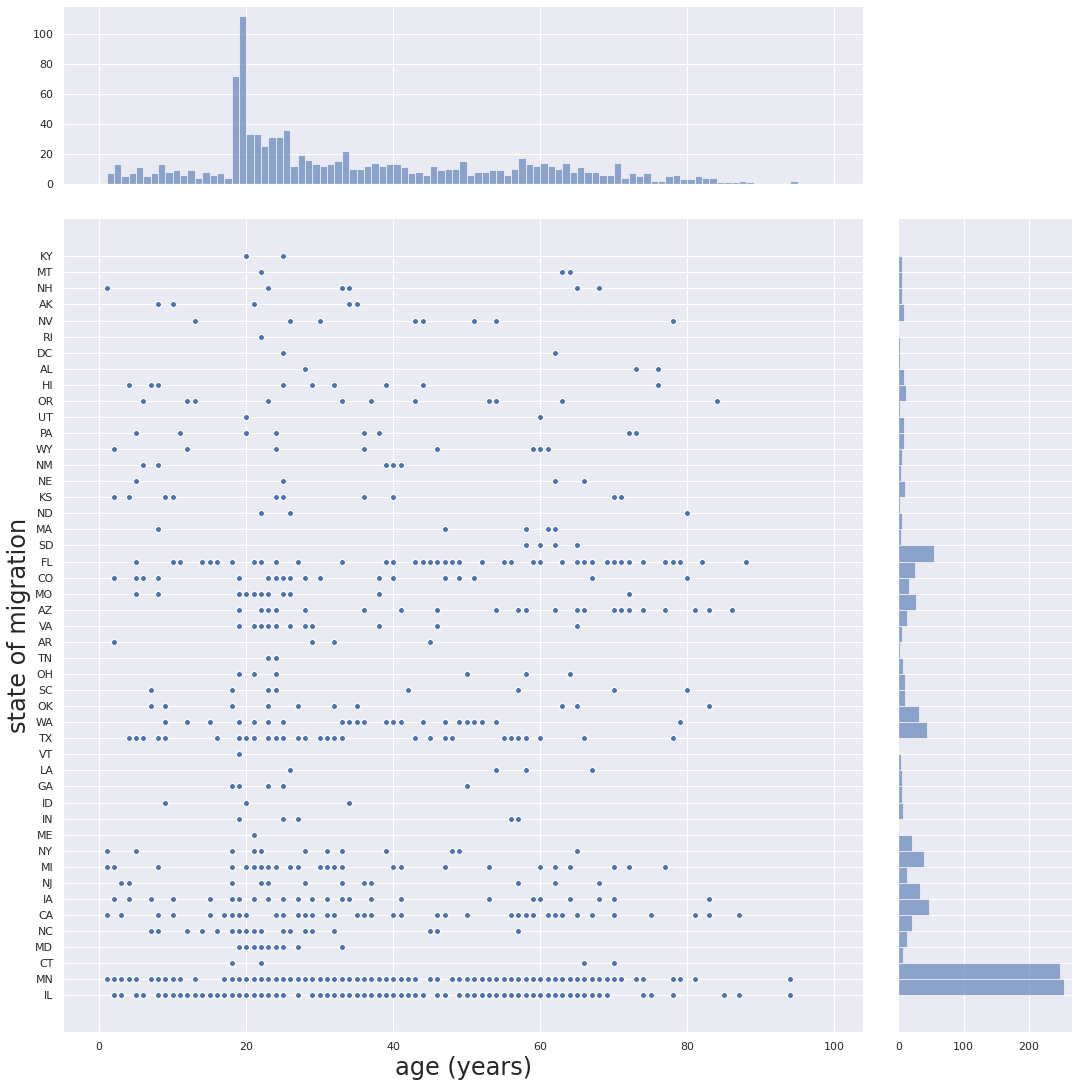

In [75]:
# we want to create a joint histogram of people's ages (AGEP)
# and the states from which they migrated in the last year (MIGSP).
# we can use seaborn's JointGrid functionality for this.
# we use this instead of the jointplot helper function to have
# more control over the histogram bin ranges.
# https://stackoverflow.com/questions/48154910/seaborn-jointplot-fixing-bin-range-in-marginals

# The full data include points from foreign countries, so
# let's limit ourselves to the United States (MIGSP <= 56).
df = df[df["MIGSP"] <= 56]

# I don't know that staying in Wisconsin is what we're after,
# so let's get rid of those entries (state code 55)
df = df[df["MIGSP"] != 55]

# create a dictionary of state codes
# I probably could read this in from somewhere, but this
# works well enough for now...
codes = {1:'AL', 2:'AK', 4:'AZ', 5:'AR', 6:'CA', 8:'CO', 9:'CT', 10:'DE', 11:'DC', 12:'FL',
        13:'GA', 15:'HI', 16:'ID', 17:'IL', 18:'IN', 19:'IA', 20:'KS', 21:'KY', 22:'LA',
        23:'ME', 24:'MD', 25:'MA', 26:'MI', 27:'MN', 28:'MS', 29:'MO', 30:'MT', 31:'NE',
        32:'NV', 33:'NH', 34:'NJ', 35:'NM', 36:'NY', 37:'NC', 38:'ND', 39:'OH', 40:'OK',
        41:'OR', 42:'PA', 44:'RI', 45:'SC', 46:'SD', 47:'TN', 48:'TX', 49:'UT', 50:'VT',
        51:'VA', 53:'WA', 54:'WV', 55:'WI', 56:'WY'}

# map the MIGSP column codes to state IDs using the dictionary
df2 = df.replace({"MIGSP" : codes})

# set up the JointGrid, then add the three fields - 
# scatterplot on the interior, histograms for each
# variable (i.e., the marginals) on the sides,
# then specify better axis labels.
grid = sns.JointGrid(df2, x="AGEP", y="MIGSP", height=16, ratio=4, marginal_ticks=True)
grid = grid.plot_joint(plt.scatter, color="b", edgecolor="white")
_ = grid.ax_marg_x.hist(df2["AGEP"], color="b", alpha=.6,
                      bins=np.arange(0, 100, 1))
_ = grid.ax_marg_y.hist(df2["MIGSP"], color="b", alpha=.6,
                      orientation="horizontal",
                      bins=np.arange(0, len(df2["MIGSP"].unique()), 1))
_ = grid.set_axis_labels(xlabel="age (years)", ylabel="state of migration", fontsize=24)


# future: probably want to work with the full-nation dataset and parse from there, as
# the plot below only considers people coming to Wisconsin; it does not depict net migration